모델: ResNet18  
최적화 알고리즘: Adam
학습률: 0.0001  
이미지 크기: 224*224  
배치 사이즈: 64
weight_decay=1e-5  
드롭아웃: 0.2

In [1]:
import os
import numpy as np
import pandas as pd
import datetime
from PIL import Image, ImageEnhance, ImageOps

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data_path = "C:/Users/user/Desktop/DL_pj/train"

In [3]:
emotions = ['fearful', 'disgusted', 'angry', 'neutral', 'sad', 'surprised', 'happy']
image_counts = {}
for emotion in emotions:
    emotion_folder = os.path.join(train_data_path, emotion)
    if os.path.exists(emotion_folder):
        image_counts[emotion] = len([file for file in os.listdir(emotion_folder) if file.endswith(('.jpg', '.png'))])
    else:
        image_counts[emotion] = 0
print(image_counts)

{'fearful': 4097, 'disgusted': 436, 'angry': 3995, 'neutral': 4965, 'sad': 4830, 'surprised': 3171, 'happy': 7215}


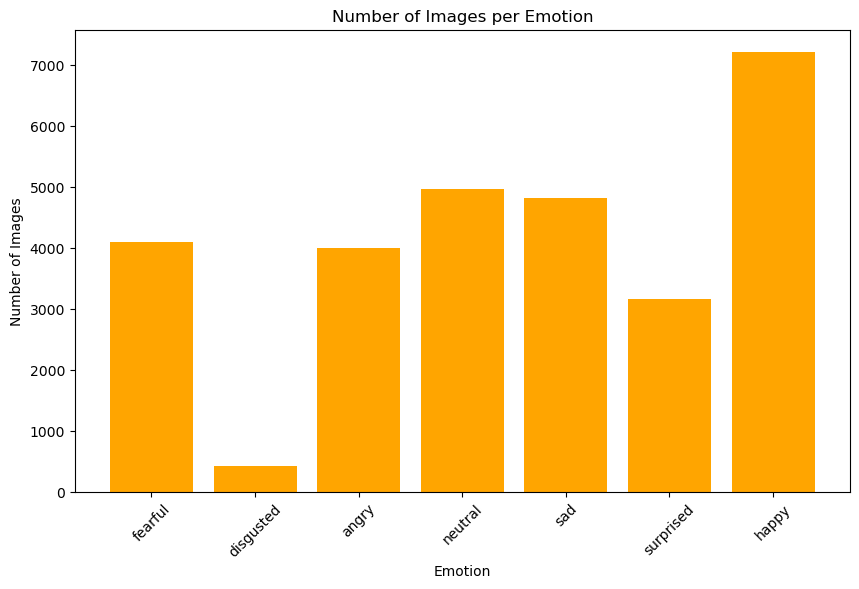

In [4]:
plt.figure(figsize=(10, 6))
plt.bar(image_counts.keys(), image_counts.values(), color='orange')
plt.xlabel('Emotion')
plt.ylabel('Number of Images')
plt.title('Number of Images per Emotion')
plt.xticks(rotation=45)
plt.show()

In [5]:
import os
import cv2
import numpy as np

input_folder = r"C:/Users/user/Desktop/DL_pj/train/disgusted"

# 이미지 증식 함수
def augment_image(image_path):
    # 이미지를 읽어옴
    img = cv2.imread(image_path)
    
    # 좌우 반전
    flipped_img = cv2.flip(img, 1)
    cv2.imwrite(os.path.join(input_folder, "flipped_" + os.path.basename(image_path)), flipped_img)
    
    # 45도 회전
    rows, cols, _ = img.shape
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
    rotated_45_img = cv2.warpAffine(img, M, (cols, rows), borderValue=(255, 255, 255))
    cv2.imwrite(os.path.join(input_folder, "rotated_45_" + os.path.basename(image_path)), rotated_45_img)
    
    # 90도 회전
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 90, 1)
    rotated_90_img = cv2.warpAffine(img, M, (cols, rows), borderValue=(255, 255, 255))
    cv2.imwrite(os.path.join(input_folder, "rotated_90_" + os.path.basename(image_path)), rotated_90_img)
    
    # 추가적인 회전 (135도)
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 135, 1)
    rotated_135_img = cv2.warpAffine(img, M, (cols, rows), borderValue=(255, 255, 255))
    cv2.imwrite(os.path.join(input_folder, "rotated_135_" + os.path.basename(image_path)), rotated_135_img)
    
    # 밝기 조정
    for factor in [0.5, 1.5, 2.0]:
        brightened_img = np.clip(img * factor, 0, 255).astype(np.uint8)
        cv2.imwrite(os.path.join(input_folder, f"brightened_{factor}_" + os.path.basename(image_path)), brightened_img)
    
    # 크기 조정
    for scale in [0.5, 1.5, 2.0]:
        resized_img = cv2.resize(img, None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)
        cv2.imwrite(os.path.join(input_folder, f"resized_{scale}_" + os.path.basename(image_path)), resized_img)

# 원본 이미지 수 계산
original_image_count = len([file for file in os.listdir(input_folder) if file.endswith(('.jpg', '.png'))])

# 모든 이미지 증식
for filename in os.listdir(input_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        augment_image(os.path.join(input_folder, filename))

# 증식 후 이미지 수 계산
total_image_count = len([file for file in os.listdir(input_folder) if file.endswith(('.jpg', '.png'))])

print(f"Original image count: {original_image_count}")
print(f"Total image count after augmentation: {total_image_count}")


Original image count: 436
Total image count after augmentation: 4796


In [6]:
print(f"Number of original images: {original_image_count}")
print(f"Total number of images after augmentation: {total_image_count}")
print("Image augmentation completed.")

Number of original images: 436
Total number of images after augmentation: 4796
Image augmentation completed.


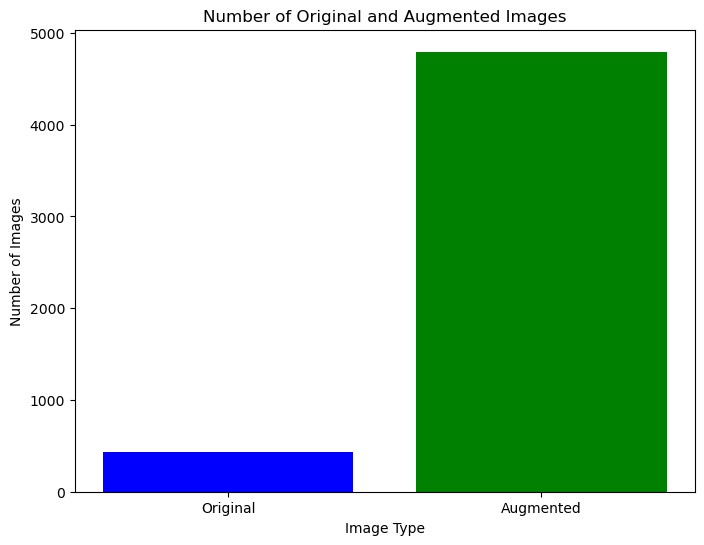

In [7]:
labels = ['Original', 'Augmented']
counts = [original_image_count, total_image_count]
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['blue', 'green'])
plt.xlabel('Image Type')
plt.ylabel('Number of Images')
plt.title('Number of Original and Augmented Images')
plt.show()

In [8]:
emotions = ['fearful', 'disgusted', 'angry', 'neutral', 'sad', 'surprised', 'happy']
image_counts = {}
for emotion in emotions:
    emotion_folder = os.path.join(train_data_path, emotion)
    if os.path.exists(emotion_folder):
        image_counts[emotion] = len([file for file in os.listdir(emotion_folder) if file.endswith(('.jpg', '.png'))])
    else:
        image_counts[emotion] = 0
print(image_counts)

{'fearful': 4097, 'disgusted': 4796, 'angry': 3995, 'neutral': 4965, 'sad': 4830, 'surprised': 3171, 'happy': 7215}


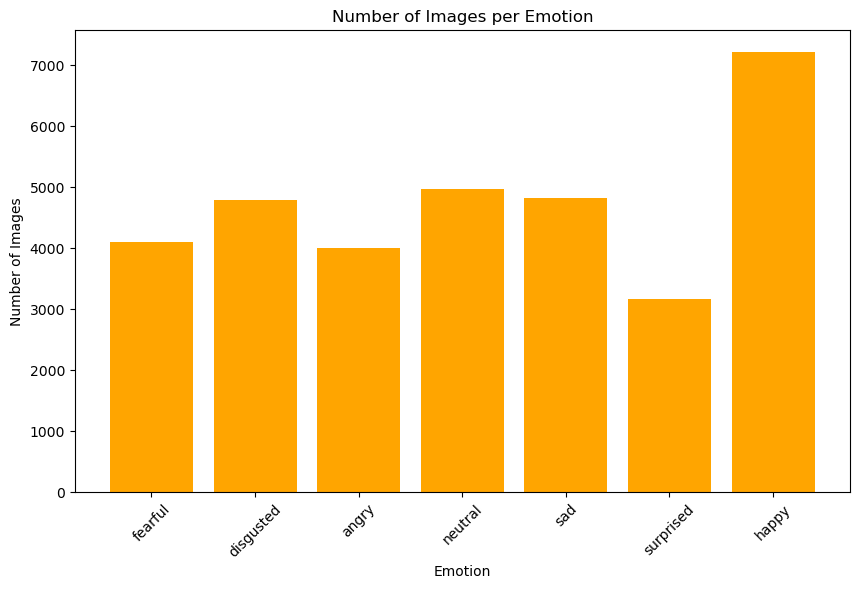

In [9]:
plt.figure(figsize=(10, 6))
plt.bar(image_counts.keys(), image_counts.values(), color='orange')
plt.xlabel('Emotion')
plt.ylabel('Number of Images')
plt.title('Number of Images per Emotion')
plt.xticks(rotation=45)
plt.show()

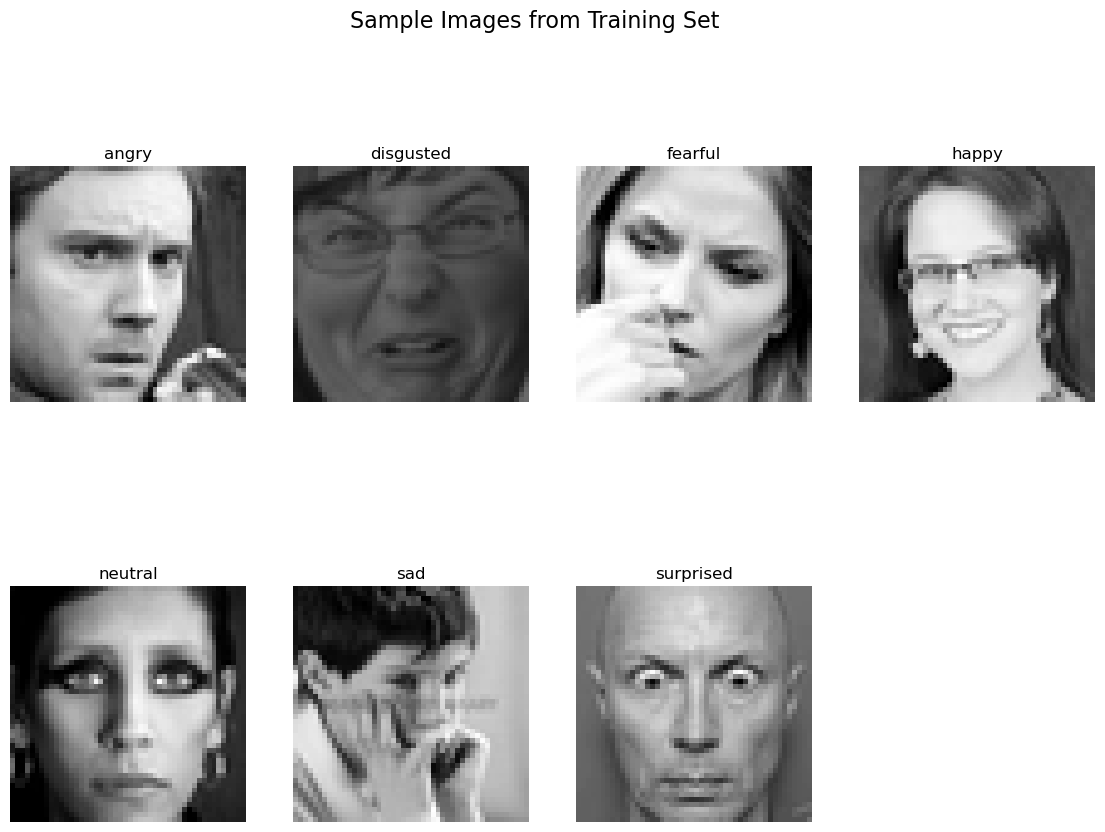

In [10]:
plt.figure(figsize=(14, 10))
for i, expression in enumerate(os.listdir(train_data_path), 1):
    img_path = os.path.join(train_data_path, expression, os.listdir(os.path.join(train_data_path, expression))[0])
    img = plt.imread(img_path)
    plt.subplot(2, 4, i)
    plt.imshow(img, cmap='gray')
    plt.title(expression)
    plt.axis('off')
plt.suptitle('Sample Images from Training Set', fontsize=16)
plt.show()

In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet18

In [2]:
# 데이터셋 불러오기
train_data_path = "C:/Users/user/Desktop/DL_pj/train"
test_data_path = "C:/Users/user/Desktop/DL_pj/test"
# 이미지 변환 설정
transform = transforms.Compose([
    transforms.Grayscale(),  # 입력 이미지를 grayscale로 변환
    transforms.Resize((224, 224)),  # 이미지 크기 조정
    transforms.ToTensor(),  # 이미지를 Tensor로 변환
    transforms.Normalize((0.516409158706665,), (0.25556933879852295,))  # 이미지 정규화
])

# train 데이터셋
train_dataset = datasets.ImageFolder(root=train_data_path, transform=transform)

# test 데이터셋
test_dataset = datasets.ImageFolder(root=test_data_path, transform=transform)

# 데이터로더 설정
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [3]:
# 클래스 수 확인
num_classes = len(train_dataset.classes)
print(f"Number of classes: {num_classes}")

# GPU 사용 가능 여부 확인
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

Number of classes: 7
Device: cuda


In [4]:
# ResNet 모델 정의 (pre-trained 모델 사용)
class ResNetModel(nn.Module):
    def __init__(self, num_classes):
        super(ResNetModel, self).__init__()
        self.resnet = resnet18(pretrained=True)  # pre-trained ResNet-18 모델 사용
        # ResNet의 첫 번째 콘볼루션 레이어의 입력 채널 수 수정
        self.resnet.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        # ResNet의 마지막 fully connected layer 대체
        in_features = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(in_features, num_classes)
        # 드롭아웃 추가
        self.dropout = nn.Dropout(0.2)
    
    def forward(self, x):
        x = self.resnet(x)
        x = self.dropout(x)
        return x

# 모델 생성
model = ResNetModel(num_classes=num_classes)

# 모델을 GPU로 이동
model.to(device)

c:\ProgramData\anaconda3\envs\DL\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\ProgramData\anaconda3\envs\DL\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNetModel(
  (resnet): ResNet(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_

In [5]:
# 리스트 초기화
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

In [6]:
# 옵티마이저 정의
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)

# 손실 함수 정의
criterion = nn.CrossEntropyLoss()

# 훈련 함수 정의
def train(model, train_loader, optimizer, epoch):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for batch_idx, (inputs, targets) in enumerate(train_loader):
        inputs = inputs.to(device)  # 이미지를 GPU로 이동
        targets = targets.to(device)  # 레이블을 GPU로 이동
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
    
    # epoch이 끝날 때 전체 훈련 손실과 정확도 기록
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100. * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    
    print(f"Epoch {epoch+1}, Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_accuracy:.2f}%")

In [7]:
# 테스트 함수
def test(model, test_loader):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
    
    # 전체 테스트 데이터셋에 대한 손실과 정확도 계산
    test_loss /= len(test_loader)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    
    test_losses.append(test_loss)  # 테스트 손실 기록
    test_accuracies.append(test_accuracy)  # 테스트 정확도 기록
    
    print(f"Test Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.2f}%")


In [8]:
# 훈련 및 테스트 실행
import time
start_time = time.time()

for epoch in range(0,20):
    start_epoch = time.time()
    train(model, train_loader, optimizer, epoch)
    test(model, test_loader)
    elapsed_time = time.time() - start_epoch
    print(f"Epoch time: {elapsed_time:.2f} seconds")
elapsed_time = time.time() - start_time
print(f"Total elapsed time: {elapsed_time:.2f} seconds")

Epoch 1, Train Loss: 1.2961, Train Accuracy: 50.61%
Test Loss: 1.1073, Accuracy: 58.99%
Epoch time: 256.57 seconds
Epoch 2, Train Loss: 0.9606, Train Accuracy: 63.58%
Test Loss: 1.0624, Accuracy: 60.78%
Epoch time: 255.33 seconds
Epoch 3, Train Loss: 0.7656, Train Accuracy: 71.09%
Test Loss: 1.0208, Accuracy: 63.53%
Epoch time: 255.40 seconds
Epoch 4, Train Loss: 0.5680, Train Accuracy: 77.89%
Test Loss: 1.0974, Accuracy: 63.35%
Epoch time: 255.16 seconds
Epoch 5, Train Loss: 0.4159, Train Accuracy: 83.23%
Test Loss: 1.2959, Accuracy: 63.81%
Epoch time: 254.57 seconds
Epoch 6, Train Loss: 0.3111, Train Accuracy: 86.66%
Test Loss: 1.3944, Accuracy: 64.20%
Epoch time: 257.99 seconds
Epoch 7, Train Loss: 0.2591, Train Accuracy: 88.37%
Test Loss: 1.5259, Accuracy: 63.21%
Epoch time: 260.28 seconds
Epoch 8, Train Loss: 0.2482, Train Accuracy: 88.36%
Test Loss: 1.7438, Accuracy: 62.06%
Epoch time: 259.43 seconds
Epoch 9, Train Loss: 0.2445, Train Accuracy: 88.38%
Test Loss: 1.6583, Accuracy:

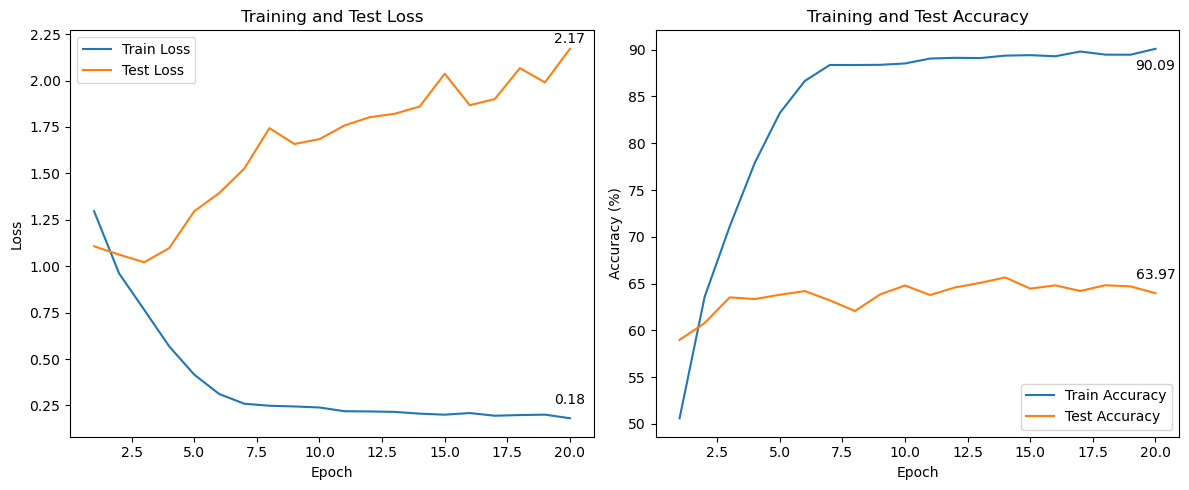

In [12]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
axes[0].plot(range(1, len(test_losses) + 1), test_losses, label='Test Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].set_title('Training and Test Loss')

axes[0].annotate(f'{train_losses[-1]:.2f}', (len(train_losses), train_losses[-1]),
                 textcoords="offset points", xytext=(0,10), ha='center')
axes[0].annotate(f'{test_losses[-1]:.2f}', (len(test_losses), test_losses[-1]),
                 textcoords="offset points", xytext=(0,4), ha='center')

# 정확도 그래프
axes[1].plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Train Accuracy')
axes[1].plot(range(1, len(test_accuracies) + 1), test_accuracies, label='Test Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy (%)')
axes[1].legend()
axes[1].set_title('Training and Test Accuracy')

axes[1].annotate(f'{train_accuracies[-1]:.2f}', (len(train_accuracies), train_accuracies[-1]),
                 textcoords="offset points", xytext=(0,-15), ha='center')
axes[1].annotate(f'{test_accuracies[-1]:.2f}', (len(test_accuracies), test_accuracies[-1]),
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()